In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
path = 'drive/My Drive/股票'
db = sqlite3.connect(path + '/twstock_indie.db')
df = pd.read_sql(con=db, sql='select * from "8163"')

In [ ]:
dfTest = df.copy()
dfTest.index = dfTest['Date']
dfTest['收盤價'] = pd.to_numeric(dfTest['收盤價'])
dfTest = dfTest[['證券名稱','成交股數','開盤價','最高價','最低價','收盤價']]
dfTest.columns = ['name', 'volumn','open','high','low','close']
dfTest.head()

,name,volumn,open,high,low,close
Date,,,,,,
2019-06-03 00:00:00,達方,"846,000",43.15,43.15,42.60,42.80
2019-06-04 00:00:00,達方,"833,212",43.00,43.30,42.65,42.75
2019-06-05 00:00:00,達方,"1,326,714",43.25,43.30,42.05,42.20
2019-06-06 00:00:00,達方,"1,273,380",42.20,42.40,41.70,41.75
2019-06-10 00:00:00,達方,"987,975",42.10,42.70,41.90,42.60


> ## ma



In [ ]:
dfTest['ma_5'] = dfTest['close'].rolling(5).mean()
dfTest['ma_10'] = dfTest['close'].rolling(10).mean()
dfTest['ma_20'] = dfTest['close'].rolling(20).mean()
dfTest['ma_60'] = dfTest['close'].rolling(60).mean()


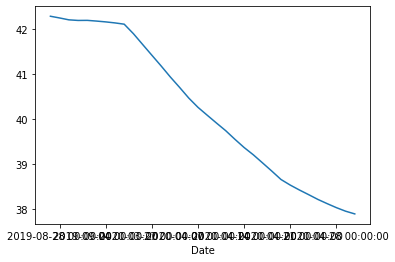

In [ ]:
dfTest['ma_60'].plot()

> ## ema


In [ ]:
dfTest['ema_12'] = dfTest['close'].ewm(span=12).mean()
dfTest['ema_26'] = dfTest['close'].ewm(span=26).mean()

In [ ]:
dfTest['ema_5'] = dfTest['close'].ewm(span=5).mean()
dfTest['ema_10'] = dfTest['close'].ewm(span=10).mean()
dfTest['ema_20'] = dfTest['close'].ewm(span=20).mean()
dfTest['ema_60'] = dfTest['close'].ewm(span=60).mean()

> ## macd

In [ ]:
dfTest['dif'] = dfTest['ema_12'] - dfTest['ema_26']
dfTest['dem'] = dfTest['dif'].ewm(span=9).mean()
dfTest['osc'] = dfTest['dif'] - dfTest['dem']

> ## rsi

In [ ]:
dfTest['rsi_dif'] = dfTest['close'].diff()
dfTest['rsi_u'] = dfTest['rsi_dif'].apply(lambda x:x if x>=0 else 0)
dfTest['rsi_d'] = dfTest['rsi_dif'].apply(lambda x:-x if x<0 else 0)

In [ ]:
print(dfTest['close'].head())
print(dfTest['rsi_dif'].head())
print(dfTest['rsi_u'].head())
print(dfTest['rsi_d'].head())


Date
2019-06-03 00:00:00    42.80
2019-06-04 00:00:00    42.75
2019-06-05 00:00:00    42.20
2019-06-06 00:00:00    41.75
2019-06-10 00:00:00    42.60
Name: close, dtype: float64
Date
2019-06-03 00:00:00     NaN
2019-06-04 00:00:00   -0.05
2019-06-05 00:00:00   -0.55
2019-06-06 00:00:00   -0.45
2019-06-10 00:00:00    0.85
Name: rsi_dif, dtype: float64
Date
2019-06-03 00:00:00    0.00
2019-06-04 00:00:00    0.00
2019-06-05 00:00:00    0.00
2019-06-06 00:00:00    0.00
2019-06-10 00:00:00    0.85
Name: rsi_u, dtype: float64
Date
2019-06-03 00:00:00    0.00
2019-06-04 00:00:00    0.05
2019-06-05 00:00:00    0.55
2019-06-06 00:00:00    0.45
2019-06-10 00:00:00    0.00
Name: rsi_d, dtype: float64


In [ ]:
rsiSpan = 10
dfTest['rs'] = dfTest['rsi_u'].ewm(span=rsiSpan).mean() / dfTest['rsi_d'].ewm(span=rsiSpan).mean()
dfTest['rsi'] = (1- (1/(1+dfTest['rs']))) * 100
dfTest['rsi'].tail()

Date
2020-04-24 00:00:00    61.021001
2020-04-27 00:00:00    68.981825
2020-04-28 00:00:00    75.917975
2020-04-29 00:00:00    76.348910
2020-04-30 00:00:00    79.489077
Name: rsi, dtype: float64

>  ## plot

In [ ]:
dfTest = dfTest['2018-09-01':]
dfTest.head()

,name,volumn,open,high,low,close,ma_5,ma_10,ma_20,ma_60,ema_12,ema_26,ema_5,ema_10,ema_20,ema_60,dif,dem,osc,rsi_dif,rsi_u,rsi_d,rs,rsi
Date,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-03 00:00:00,達方,"846,000",43.15,43.15,42.60,42.80,NaN,NaN,NaN,NaN,42.800000,42.800000,42.800000,42.800000,42.800000,42.800000,0.000000,0.000000,0.000000,NaN,0.00,0.00,NaN,NaN
2019-06-04 00:00:00,達方,"833,212",43.00,43.30,42.65,42.75,NaN,NaN,NaN,NaN,42.772917,42.774038,42.770000,42.772500,42.773750,42.774583,-0.001122,-0.000623,-0.000499,-0.05,0.00,0.05,0.000000,0.000000
2019-06-05 00:00:00,達方,"1,326,714",43.25,43.30,42.05,42.20,NaN,NaN,NaN,NaN,42.549307,42.567792,42.500000,42.542359,42.563072,42.576636,-0.018485,-0.007944,-0.010541,-0.55,0.00,0.55,0.000000,0.000000
2019-06-06 00:00:00,達方,"1,273,380",42.20,42.40,41.70,41.75,NaN,NaN,NaN,NaN,42.296997,42.339173,42.188462,42.281312,42.328351,42.359531,-0.042176,-0.019540,-0.022636,-0.45,0.00,0.45,0.000000,0.000000
2019-06-10 00:00:00,達方,"987,975",42.10,42.70,41.90,42.60,42.42,NaN,NaN,NaN,42.379322,42.399660,42.346445,42.372799,42.394061,42.410884,-0.020338,-0.019777,-0.000561,0.85,0.85,0.00,1.112931,52.672378


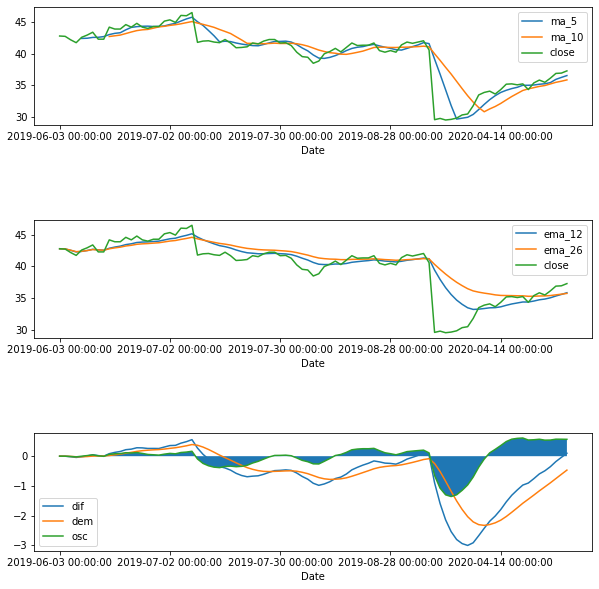

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
plt.subplots_adjust(hspace=0.8)

dfTest['ma_5'].plot(ax=ax[0])
dfTest['ma_10'].plot(ax=ax[0])
dfTest['close'].plot(ax=ax[0])
ax[0].legend()

dfTest['ema_12'].plot(ax=ax[1])
dfTest['ema_26'].plot(ax=ax[1])
dfTest['close'].plot(ax=ax[1])
ax[1].legend()

dfTest['dif'].plot(ax=ax[2])
dfTest['dem'].plot(ax=ax[2])
dfTest['osc'].plot(ax=ax[2])

ax[2].fill_between(dfTest.index, 0, dfTest['osc'])
ax[2].legend()

plt.show()

rsi

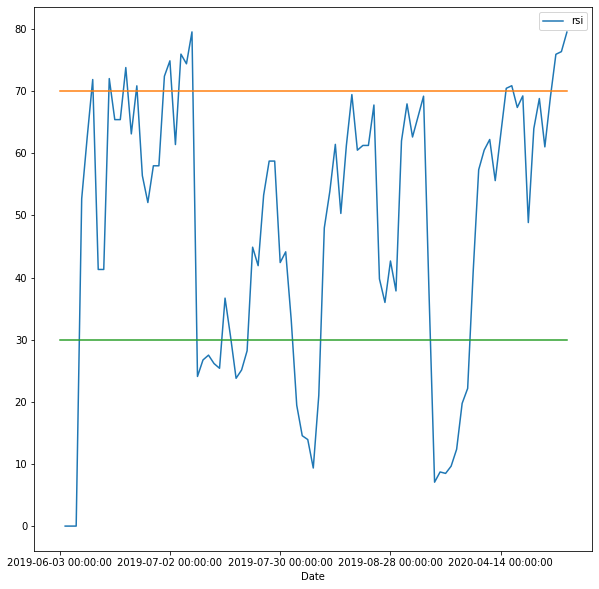

In [ ]:
plt.figure(figsize=(10,10))
dfTest['rsi'].plot()
plt.plot(dfTest.index, [70] * len(dfTest.index))
plt.plot(dfTest.index, [30] * len(dfTest.index))
plt.legend()
plt.show()
